In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [153]:
NRIQA_df_last=pd.read_csv('C:/Users/Home/Desktop/IQA/NRIQA_df_last.csv')

In [154]:
NRIQA_df_last

,CPBD,NIQE,BRISQUE,CNNIQA,ILNIQE,HYPER,WaDIQaM_LIVE,DIQaM_LIVE,WaDIQaM_TID,DIQaM_TID,DMOS,DIST_IMG
0,0.524,15.288,18.468,17.725,22.025,67.377,7.515,29.026,34.108,35.453,4.57,I01_01_01.png
1,0.407,16.106,26.225,21.482,24.490,59.614,26.515,35.895,33.785,35.580,4.33,I01_01_02.png
2,0.131,18.836,50.731,43.691,36.201,42.574,44.362,47.225,43.473,37.948,2.67,I01_01_03.png
3,0.005,18.813,70.424,61.468,59.741,38.503,56.649,58.178,58.608,40.670,1.67,I01_01_04.png
4,0.000,17.540,90.263,78.708,90.068,43.387,52.663,65.557,78.039,36.814,1.10,I01_01_05.png
...,...,...,...,...,...,...,...,...,...,...,...,...
1210,0.586,9.889,1.867,24.134,28.267,64.626,50.081,28.706,44.715,46.724,4.80,I81_03_01.png
1211,0.430,16.853,14.119,31.408,28.785,52.423,44.000,33.874,47.563,48.657,4.27,I81_03_02.png
1212,0.472,20.821,28.383,40.116,35.516,40.440,48.820,42.019,54.019,53.369,2.60,I81_03_03.png
1213,0.104,18.558,54.815,41.899,47.930,34.846,54.851,43.308,58.022,53.953,2.17,I81_03_04.png


In [155]:
# 이상치 인덱스 추출

In [ ]:
answer=list()
for idx,i in enumerate(a[::5]):
    print(idx)
    i=a.index(i,idx)
    for idx2,x in enumerate(a[i:i+5]):
        x=a[i:i+5].index(x,idx2)
        
        
        try :
            if a[i:i+5][x]< a[i:i+5][x+1]:
                answer.append((a[i:i+5][x+1],(idx*5)+a[i:i+5].index(a[i:i+5][x+1],idx2)))
            
        except IndexError:
            pass

In [ ]:
# 이상치 blur 단계 조회

In [3]:
NRIQA_df_ffhq_gau=pd.read_csv('C:/Users/Home/Desktop/IQA/NRIQA_df_ffhq_gau.csv')

In [4]:
NRIQA_df_ffhq_gau.columns

Index(['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE',
       'DIQaM_LIVE', 'WaDIQaM_TID', 'DIQaM_TID'],
      dtype='object')

In [5]:
def find_blur_level_reverse(NR):
    # cnn brisque niqe WaDIQaM
    answer=list()
    for idx,i in enumerate(NR[::5]):
        
        i=NR.index(i,idx)
        for idx2,x in enumerate(NR[i:i+5]):
            x=NR[i:i+5].index(x,idx2)
            
            
            try :
                if NR[i:i+5][x]> NR[i:i+5][x+1]:
                    # answer.append((NR[i:i+5][x+1],NR[i:i+5].index(NR[i:i+5][x+1],idx2)))
                    answer.append(NR[i:i+5].index(NR[i:i+5][x+1],idx2))
            except IndexError:
                pass
    return answer

In [6]:
def find_blur_level(NR):
    # cpbd hyper
    answer=list()
    for idx,i in enumerate(NR[::5]):
        
        i=NR.index(i,idx)
        for idx2,x in enumerate(NR[i:i+5]):
            x=NR[i:i+5].index(x,idx2)
            
            
            try :
                if NR[i:i+5][x]< NR[i:i+5][x+1]:
                    # answer.append((NR[i:i+5][x+1],NR[i:i+5].index(NR[i:i+5][x+1],idx2)))
                    answer.append(NR[i:i+5].index(NR[i:i+5][x+1],idx2))
                
            except IndexError:
                pass
    return answer


In [7]:
NIQE=find_blur_level_reverse(list(NRIQA_df_ffhq_gau['NIQE']))
BRISQUE=find_blur_level_reverse(list(NRIQA_df_ffhq_gau['BRISQUE']))
CNNIQA=find_blur_level_reverse(list(NRIQA_df_ffhq_gau['CNNIQA']))
WaDIQaM_LIVE=find_blur_level_reverse(list(NRIQA_df_ffhq_gau['WaDIQaM_LIVE']))
DIQaM_LIVE=find_blur_level_reverse(list(NRIQA_df_ffhq_gau['DIQaM_LIVE']))
WaDIQaM_TID=find_blur_level_reverse(list(NRIQA_df_ffhq_gau['WaDIQaM_TID']))
DIQaM_TID=find_blur_level_reverse(list(NRIQA_df_ffhq_gau['DIQaM_TID']))


In [8]:
CPBD=find_blur_level(list(NRIQA_df_ffhq_gau['CPBD']))
HYPER=find_blur_level(list(NRIQA_df_ffhq_gau['HYPER']))


In [ ]:
# 중복값 카운트
# count={}
# lists = NIQE
# for i in lists:
#     try: count[i] += 1
#     except: count[i]=1
# print(count)
# print(len(NIQE))

{1: 629, 2: 560, 4: 576, 3: 619}
2384


In [9]:
lists=CPBD
count_CPBD={}

for i in lists:
    try: count_CPBD[i] += 1
    except: count_CPBD[i]=1
print(count_CPBD)

{1: 595, 2: 609, 4: 585, 3: 560}


In [10]:
lists=NIQE
count_NIQE={}

for i in lists:
    try: count_NIQE[i] += 1
    except: count_NIQE[i]=1
print(count_NIQE)

{1: 629, 2: 560, 4: 576, 3: 619}


In [11]:
lists=BRISQUE
count_BRISQUE={}

for i in lists:
    try: count_BRISQUE[i] += 1
    except: count_BRISQUE[i]=1
print(count_BRISQUE)


{1: 631, 2: 580, 4: 590, 3: 620}


In [12]:
lists=CNNIQA
count_CNNIQA={}

for i in lists:
    try: count_CNNIQA[i] += 1
    except: count_CNNIQA[i]=1
print(count_CNNIQA)

{1: 644, 2: 563, 4: 603, 3: 594}


In [13]:
lists=HYPER
count_HYPER={}

for i in lists:
    try: count_HYPER[i] += 1
    except: count_HYPER[i]=1
print(count_HYPER)

{4: 163, 1: 27, 3: 11, 2: 1}


In [14]:
lists=WaDIQaM_LIVE
count_WaDIQaM_LIVE={}

for i in lists:
    try: count_WaDIQaM_LIVE[i] += 1
    except: count_WaDIQaM_LIVE[i]=1
print(count_WaDIQaM_LIVE)

{1: 638, 3: 556, 2: 625, 4: 611}


In [15]:
lists=DIQaM_LIVE
count_DIQaM_LIVE={}

for i in lists:
    try: count_DIQaM_LIVE[i] += 1
    except: count_DIQaM_LIVE[i]=1
print(count_DIQaM_LIVE)

{1: 625, 3: 574, 2: 598, 4: 600}


In [16]:
lists=WaDIQaM_TID
count_WaDIQaM_TID={}

for i in lists:
    try: count_WaDIQaM_TID[i] += 1
    except: count_WaDIQaM_TID[i]=1
print(count_WaDIQaM_TID)

{1: 620, 3: 572, 2: 601, 4: 594}


In [17]:
lists=DIQaM_TID
count_DIQaM_TID={}

for i in lists:
    try: count_DIQaM_TID[i] += 1
    except: count_DIQaM_TID[i]=1
print(count_DIQaM_TID)

{1: 620, 3: 570, 2: 606, 4: 622}


In [18]:
error_count=pd.DataFrame({'blur_gau_lv': [2,3,4,5],
                        'CPBD':[count_CPBD[1],count_CPBD[2],count_CPBD[3],count_CPBD[4]],
                        'NIQE':[count_NIQE[1],count_NIQE[2],count_NIQE[3],count_NIQE[4]],
                        'BRISQUE':[count_BRISQUE[1],count_BRISQUE[2],count_BRISQUE[3],count_BRISQUE[4]], 
                        'CNNIQA':[count_NIQE[1],count_NIQE[2],count_NIQE[3],count_NIQE[4]], 
                        'HYPER':[count_HYPER[1],count_HYPER[2],count_HYPER[3],count_HYPER[4]], 
                        'WaDIQaM_LIVE':[count_WaDIQaM_LIVE[1],count_WaDIQaM_LIVE[2],count_WaDIQaM_LIVE[3],count_WaDIQaM_LIVE[4]],
                        'DIQaM_LIVE':[count_DIQaM_LIVE[1],count_DIQaM_LIVE[2],count_DIQaM_LIVE[3],count_DIQaM_LIVE[4]], 
                        'WaDIQaM_TID':[count_WaDIQaM_TID[1],count_WaDIQaM_TID[2],count_WaDIQaM_TID[3],count_WaDIQaM_TID[4]], 
                        'DIQaM_TID' :[count_DIQaM_TID[1],count_DIQaM_TID[2],count_DIQaM_TID[3],count_DIQaM_TID[4]],})
                    

In [ ]:
error_count

,blur_gau_lv,CPBD,NIQE,BRISQUE,CNNIQA,HYPER,WaDIQaM_LIVE,DIQaM_LIVE,WaDIQaM_TID,DIQaM_TID
0,2,595,629,631,629,27,638,625,620,620
1,3,609,560,580,560,1,625,598,601,606
2,4,560,619,620,619,11,556,574,572,570
3,5,585,576,590,576,163,611,600,594,622


In [ ]:
error_count.to_csv('error_count_gau.csv', index=False)

In [19]:
test=pd.read_csv('error_count_gau.csv')

In [23]:
error_count.sum().sort_values()

blur_gau_lv       14
HYPER            202
CPBD            2349
NIQE            2384
CNNIQA          2384
WaDIQaM_TID     2387
DIQaM_LIVE      2397
DIQaM_TID       2418
BRISQUE         2421
WaDIQaM_LIVE    2430
dtype: int64

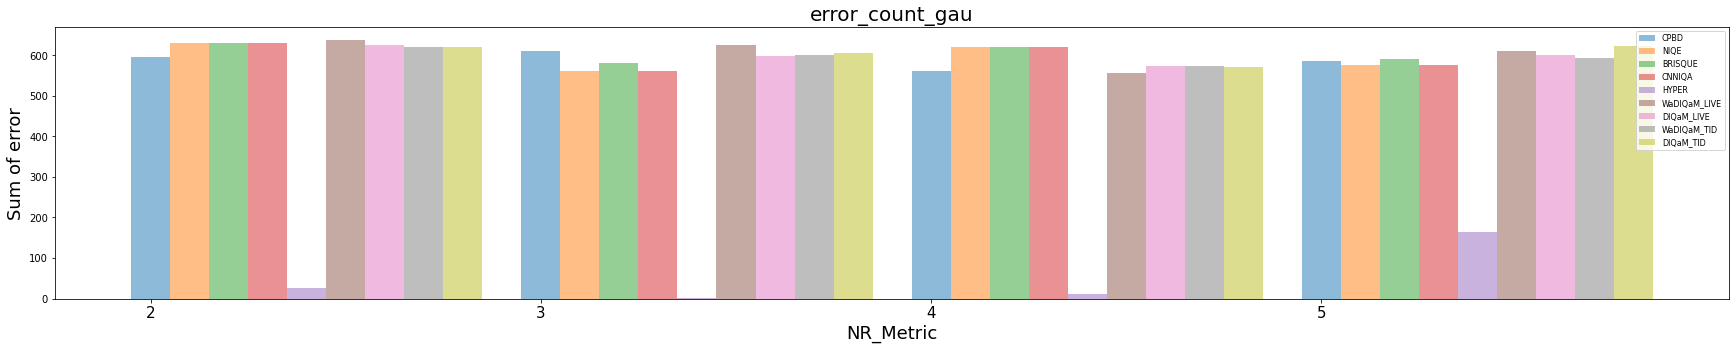

In [ ]:
bar_width = 0.1
alpha = 0.5
index=np.arange(2,6)
plt.figure(figsize=(30,5))
p1=plt.bar(index, error_count['CPBD'],bar_width,  alpha=alpha, label='CPBD')
p2=plt.bar(index+ bar_width, error_count['NIQE'],bar_width, alpha=alpha, label='NIQE')
p3=plt.bar(index+ (bar_width*2), error_count['BRISQUE'],bar_width,  alpha=alpha, label='BRISQUE')
p4=plt.bar(index+ (bar_width*3), error_count['CNNIQA'],bar_width,  alpha=alpha, label='CNNIQA')
p5=plt.bar(index+ (bar_width*4), error_count['HYPER'],bar_width,  alpha=alpha, label='HYPER')
p6=plt.bar(index+ (bar_width*5), error_count['WaDIQaM_LIVE'],bar_width,  alpha=alpha, label='WaDIQaM_LIVE')
p7=plt.bar(index+ (bar_width*6), error_count['DIQaM_LIVE'],bar_width,  alpha=alpha, label='DIQaM_LIVE')
p8=plt.bar(index+ (bar_width*7), error_count['WaDIQaM_TID'],bar_width,  alpha=alpha, label='WaDIQaM_TID')
p9=plt.bar(index+ (bar_width*8), error_count['DIQaM_TID'],bar_width,  alpha=alpha, label='DIQaM_TID')

plt.title('error_count_gau', fontsize=20)
plt.ylabel('Sum of error', fontsize=18)
plt.xlabel('NR_Metric', fontsize=18)
plt.xticks(index,error_count['blur_gau_lv'],fontsize=15)
plt.legend((p1[0], p2[0],p3[0],p4[0],p5[0],p6[0],p7[0],p8[0],p9[0]), ('CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'HYPER', 'WaDIQaM_LIVE',
       'DIQaM_LIVE', 'WaDIQaM_TID', 'DIQaM_TID'), fontsize=8)
plt.show()

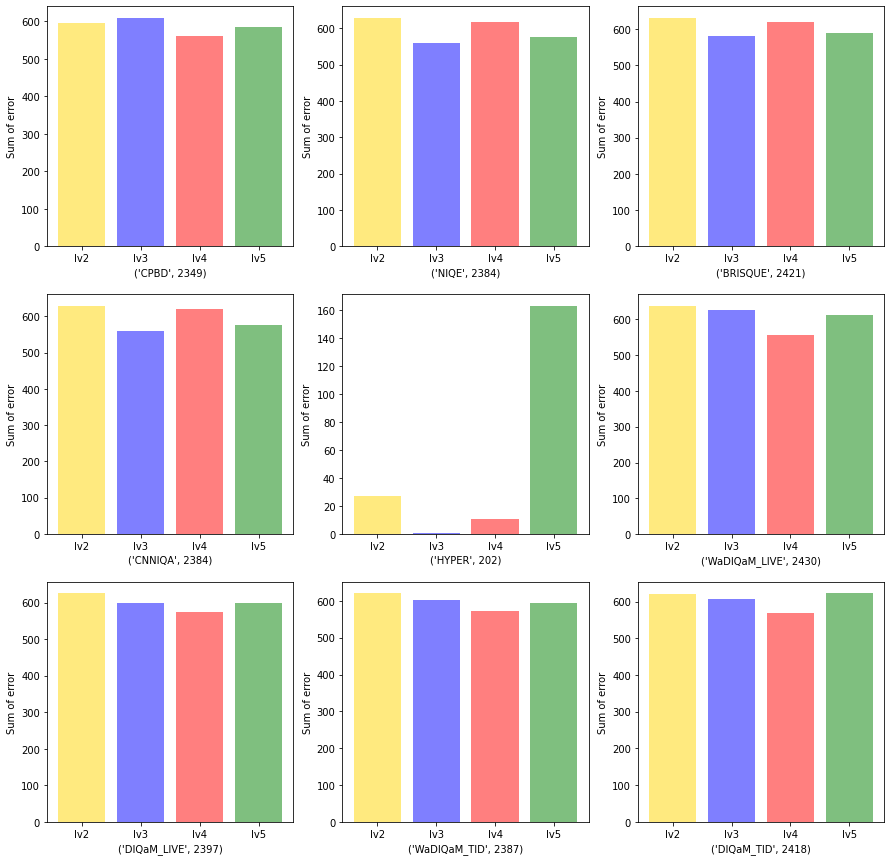

In [24]:
plt.figure(figsize=(15,15))
n=1
for i in error_count.columns[1:]:
    
    plt.subplot(3, 3, n) #sharex=ax1)
    plt.bar(['lv2','lv3','lv4','lv5'], error_count[f'{i}'],  color = ['gold', 'b', '#FF0000', 'green'], alpha=0.5, label=f'{i}')
    plt.ylabel('Sum of error', fontsize=10)
    plt.xlabel((f'{i}', error_count[f'{i}'].sum()), fontsize=10)
    n+=1